<a href="https://colab.research.google.com/github/Ariel29961/Recommendation-Systems/blob/main/recsys_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Students Name and ID:
##### 1:
##### 2:

# Recommender Systems - 2025
# *Homework 1 - Evaluation Metrics*
### Due Date - 5 December, 2024

### In this assignment you will get familiar with a well-known dataset of movie ratings, and explore various RS evaluation metrics. This work will set the grounds for homework 2, in which you will build, optimize and evaluate RS models based on matrix factorization.

#### Instructions:

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be turned in pairs, by one of the teammates.

Cells that require your input (in the form of code or written response) will have 'Question #' above.

Make sure the entire notebook runs without errors and includes all plots, code and explanations.

After completing the assignment, please download the notebook to an '.ipynb' file and submit it on moodle.

## Data exploration

In this section, you will load the MovieLens 100K rating dataset, extract a rating matix, and get familiar with the data.

The MovieLens 100K is a commonly used dataset, including 100,000 ratings (1-5) from 943 users on 1682 movies. This dataset is considered an explicit feedback dataset for having user ratings (as opposed to implicit feedback datasets where information such as clicks and views are available and can be considered as a proxy for user's preference)

In [1]:
import os
import requests
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
url = "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
zip_name = url.split("/")[-1]
data_dir = "ml-100k/"

r = requests.get(url, allow_redirects=True)
with open(zip_name, "wb") as f:
    f.write(r.content)

with zipfile.ZipFile(zip_name, "r") as zip_ref:
    zip_ref.extractall()

In [3]:
cols_data = ["user_id", "item_id", "rating", "timestamp"]
cols_user = ["user_id", "age", "gender", "occupation", "zip code"]
cols_item = [
    "movie id",
    "movie_title",
    "release_date",
    "video_release_date",
    "IMDb_URL",
    "unknown",
    "Action",
    "Adventure",
    "Animation",
    "Childrens",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film_Noir",
    "Horror",
    "Musical",
    "Mystery",
    "Romance",
    "Sci_Fi",
    "Thriller",
    "War",
    "Western",
]

In [4]:
df_users = pd.read_csv(
    os.path.join(data_dir, "u.user"),
    delimiter="|",
    header=None,
    names=cols_user,
)
df_users.shape

(943, 5)

In [5]:
df_items = pd.read_csv(
    os.path.join(data_dir, "u.item"),
    delimiter="|",
    header=None,
    names=cols_item,
    encoding="ISO-8859-1",
)
df_items.shape

(1682, 24)

In [6]:
df_ratings = pd.read_csv(
    os.path.join(data_dir, "u.data"),
    delimiter="\t",
    header=None,
    names=cols_data,
)
df_ratings.shape

(100000, 4)

---

####Question 1 (5 points)

Build a ratings matrix with users as rows, items as columns, and ratings as the elements of the matrix.

Replace empty ratings with zeros.

In [12]:
ratings = df_ratings.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

ratings.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

#### Question 2 (5 points)

Calculate the dataset sparsity

Remider:
$$
Sparsity = 1 - \frac{\text{number of nonzero ratings in the matrix}}{\text{number of users}\times\text{number of items}}
$$

In [13]:
n_users = ratings.shape[0]
n_items = ratings.shape[1]
nonzero_ratings = (ratings != 0.0).sum().sum()

sparsity = 1 - (nonzero_ratings / (n_users * n_items))

print(n_users * n_items)
print(f"number of nonzero ratings in the matrix: {nonzero_ratings}")
print(f"Sparsity of the dataset: {sparsity:.6f}")


1586126
number of nonzero ratings in the matrix: 100000
Sparsity of the dataset: 0.936953


---

#### EDA (Questions Below)

        count
rating       
1        6110
2       11370
3       27145
4       34174
5       21201


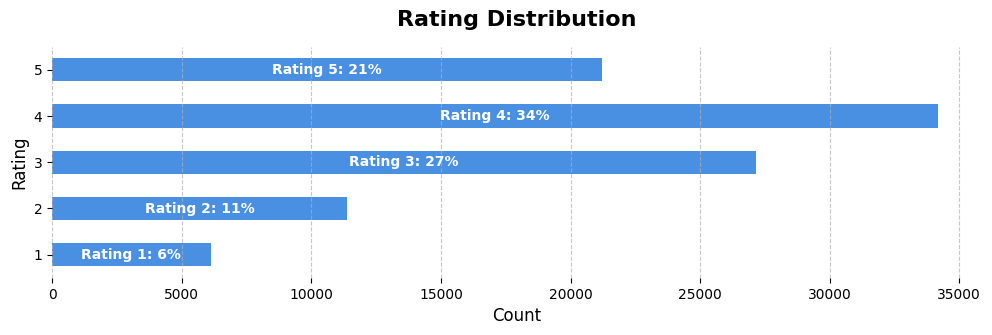

In [ ]:
p = df_ratings.groupby("rating")["rating"].agg(["count"])
print(p)
fig, ax = plt.subplots(figsize=(12, 3))
p.plot(kind="barh", legend=False, ax=ax, color="#4a90e2")

ax.set_title("Rating Distribution", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Rating", fontsize=12)
ax.grid(axis="x", linestyle="--", alpha=0.7)
ax.set_frame_on(False)

total_count = p["count"].sum()
for i, (index, row) in enumerate(p.iterrows()):
    percentage = (row["count"] / total_count) * 100
    ax.text(
        row["count"] / 2,
        i,
        f"Rating {index}: {percentage:.0f}%",
        color="white",
        weight="bold",
        ha="center",
        va="center",
    )

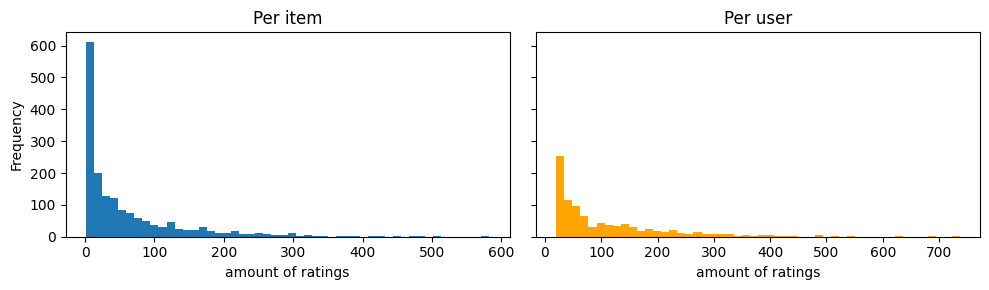

In [21]:
fig, ax = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(10, 3))

ratings.astype(bool).sum(axis=0).plot.hist(ax=ax[0], bins=50)
ratings.astype(bool).sum(axis=1).plot.hist(ax=ax[1], color="orange", bins=50)
ax[0].set_title("Per item")
ax[1].set_title("Per user")
ax[0].set_xlabel("amount of ratings")
ax[1].set_xlabel("amount of ratings")
fig.tight_layout();

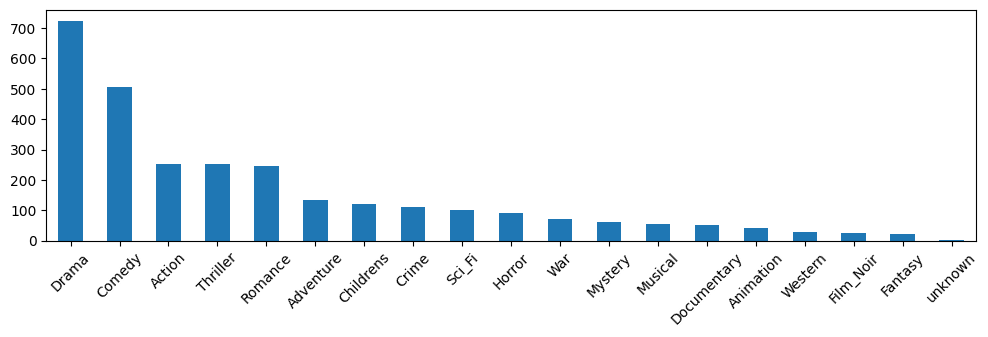

In [ ]:
plt.figure(figsize=(12, 3))
df_items.iloc[:, 5:].sum().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=45)
plt.show();

#### Question 3 (10 points)

a. How many items are frequently rated (>100 ratings)?

b. How many items are rarely rated (<10 ratings)?

c. How many users rate frequently (>100 ratings)?

d. How many users rate rarely? (<10 ratings)?

e. What challenges are we facing when building a recommender system for this dataset?

<br>
You can add additional plots or calculations to justify your answer

In [ ]:
frequently_rated_items = (ratings.astype(bool).sum(axis=0) > 100).sum()
print(f"a. Number of items frequently rated (>100 ratings): {frequently_rated_items}")

rarely_rated_items = (ratings.astype(bool).sum(axis=0) < 10).sum()
print(f"b. Number of items rarely rated (<10 ratings): {rarely_rated_items}")

frequent_raters = (ratings.astype(bool).sum(axis=1) > 100).sum()
print(f"c. Number of users who rate frequently (>100 ratings): {frequent_raters}")

rare_raters = (ratings.astype(bool).sum(axis=1) < 10).sum()
print(f"d. Number of users who rate rarely (<10 ratings): {rare_raters}")



a. Number of items frequently rated (>100 ratings): 334
b. Number of items rarely rated (<10 ratings): 530
c. Number of users who rate frequently (>100 ratings): 361
d. Number of users who rate rarely (<10 ratings): 0


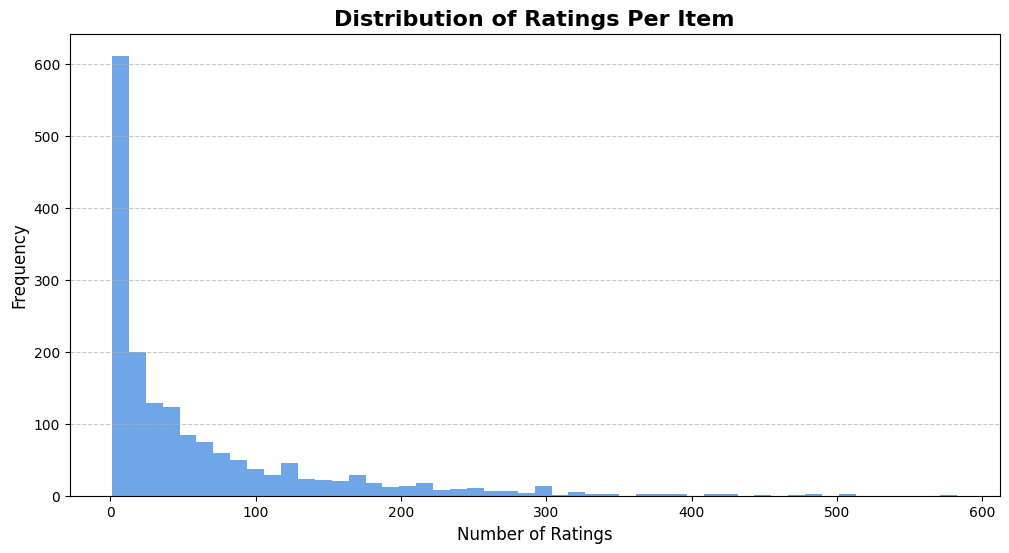

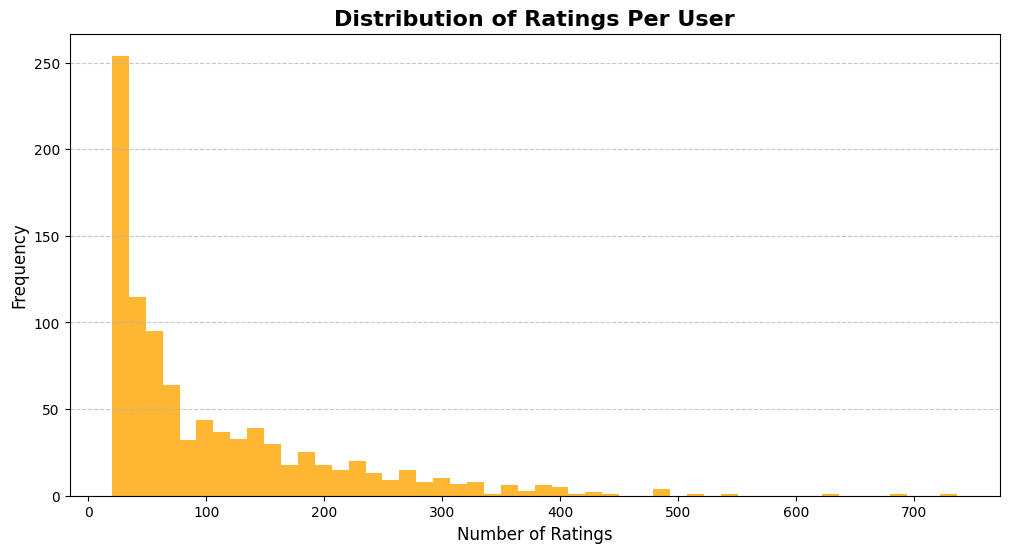

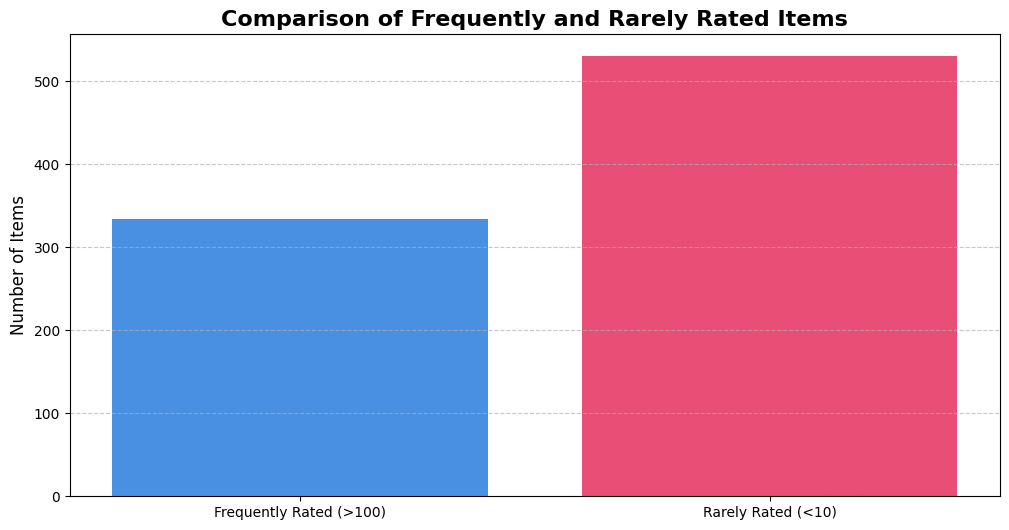

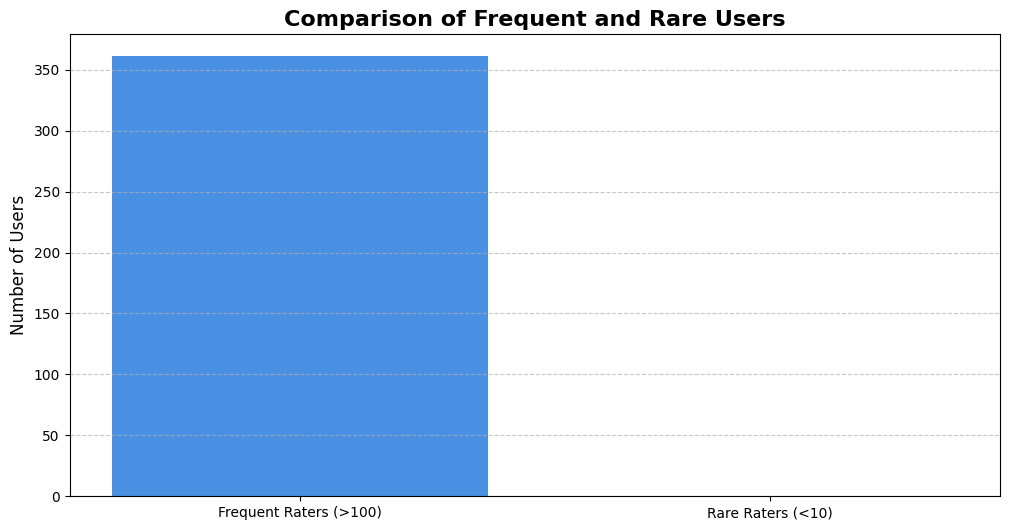

In [46]:

item_rating_counts = ratings.astype(bool).sum(axis=0)
plt.figure(figsize=(12, 6))
item_rating_counts.plot.hist(bins=50, color="#4a90e2", alpha=0.8)
plt.title("Distribution of Ratings Per Item", fontsize=16, fontweight="bold")
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

user_rating_counts = ratings.astype(bool).sum(axis=1)

plt.figure(figsize=(12, 6))
user_rating_counts.plot.hist(bins=50, color="orange", alpha=0.8)
plt.title("Distribution of Ratings Per User", fontsize=16, fontweight="bold")
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(["Frequently Rated (>100)", "Rarely Rated (<10)"],
        [item_rating_counts[item_rating_counts > 100].count(), item_rating_counts[item_rating_counts < 10].count()],
        color=["#4a90e2", "#e94e77"])
plt.title("Comparison of Frequently and Rarely Rated Items", fontsize=16, fontweight="bold")
plt.ylabel("Number of Items", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(["Frequent Raters (>100)", "Rare Raters (<10)"],
        [user_rating_counts[user_rating_counts > 100].count(), user_rating_counts[user_rating_counts < 10].count()],
        color=["#4a90e2", "#e94e77"])
plt.title("Comparison of Frequent and Rare Users", fontsize=16, fontweight="bold")
plt.ylabel("Number of Users", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

frequently_rated_items = item_rating_counts[item_rating_counts > 100].count()
rarely_rated_items = item_rating_counts[item_rating_counts < 10].count()
frequent_raters = user_rating_counts[user_rating_counts > 100].count()
rare_raters = user_rating_counts[user_rating_counts < 10].count()


 The biggest challenge we we face when building a recommender system for this dataset is the sparsity of the data. As we can see from the "ratings per item" histogram, most items get relatively low number of ratings. This means that trying to use collaborative filtering to recommend a movie for a user may not be possible for most items, as there will not be enough ratings to find common items. Similarly, the "ratings per user" histogram suggests that most users rated relatively few items, which may also be insufficient for using collaborative filtering to suggest on movies based on user similarities.

Another challenge we may face with this dataset is that highly accurate recommendations often result in repetitive suggestions, disproportionately favoring popular movies while sidelining less-known ones. This can lead to a lack of diversity in recommendations, potentially reducing user satisfaction over time.

Another challenging issue may arise due to the fact that user preferences and movie popularity evolve over time; The dataset does not include timestamps for when ratings were given, and as a result, some recommendations may become outdated or fail to reflect changes in user behavior.

Finally, a challenge may arise when recommending movies based on their genre. As shown in the genre distribution plot, some genres have relatively few movies, making it difficult to compare users' satisfaction with other movies within the same genre.

---

## Popularity based RS model - trainning & evaluation

In this section, you will divide the data into train and test sets, implement and explore various evaluation metrics, and test them on the popularity based RS model.

In [65]:
def train_test_split(
    ratings: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    """Splits rating matrix to train and test.

    Args:
        ratings: rating matrix.

    Returns:
        Train and test matrices.
    """
    test = ratings.copy()
    test.iloc[:, :] = 0
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        non_zero_items = ratings.iloc[user, :].to_numpy().nonzero()[0]
        test_ratings = np.random.choice(non_zero_items, size=10, replace=False)
        train.iloc[user, test_ratings] = 0
        test.iloc[user, test_ratings] = ratings.iloc[user, test_ratings]

    # Test and training are truly disjoint.
    assert(np.all((train * test) == 0))
    return train, test

train, test = train_test_split(ratings)
train.shape, test.shape

((943, 1682), (943, 1682))

#### Question 4 (60 points)
Implement the following evaluation metrics using only numpy and pandas:
1. RMSE
2. MRR
3. DCG
4. IDCG
5. nDCG
6. MAP


####Reminder:

<img src='https://drive.google.com/uc?id=1KAaJ5RRHFrMseBTnW1o71ZvrpbrxeQ4f' width="250">

<img src='https://drive.google.com/uc?id=18bVps-_zx07aLcHXFisPQoMaibAJ4nzP' width="250">

<img src='https://drive.google.com/uc?id=1jO7owkzOmcRbHpWn7LgWdq0GNQFD1665' width="350">

<img src='https://drive.google.com/uc?id=1tg-Kl1hYu3WVzQ26fMfA7KQ8S8JqWVnh' width="600">

Notes:
* Refer to the slides about 'Recommender Systems Evaluation' for the math formulas.
* Consider edge cases such as division by zero, NaN, Null, Zeros, out of bound, eval time, etc.
* You may change the function signatures (but not required).





In [ ]:
class PopularityRS:

    def __init__(self, train: pd.DataFrame):
      """Trains popularity based recommender system model.

        Args:
          train: rating matrix.
      """
      self.train = train
      self.n_users, self.n_items = train.shape
      self.model_params = {}

    def fit_popularity(self):
        """Computes parameters in a popularity-based algorithm."""
        self.model_params["popularity"] = np.zeros(self.train.shape)
        popularity = self.model_params["popularity"]
        item_avg = np.ma.masked_equal(self.train, value=0).mean(axis=0)
        item_avg[np.isnan(item_avg)] = 0
        for i in range(1, self.n_items):
            popularity[:, i] = item_avg.data[i]
        self.model_params["popularity"] = popularity

    def recommend_unseen(self, user: int, n_items: int) -> list:
        """Recommends unseen items per user, oredered by predicted ratings desc.

        Args:
          user: user id.
          n_items: number of items to suggest.

        Returns:
          Top suggestions.
        """
        predicted_ratings = self.model_params["popularity"][user]
        pred_sorted = np.argsort(predicted_ratings)[::-1]
        unseen_movie = np.where(self.train.iloc[user] == 0)
        final = pred_sorted[np.in1d(pred_sorted, unseen_movie)]
        return final[:n_items]

    def predict(self, user: int, item: int) -> float:
        """Predicts the rating of a specific item for a specific user.

        Args:
          user: user id.
          item: item id.

        Returns:
          Predicted rating.
        """
        predicted_rating = self.model_params["popularity"][user, item]
        return predicted_rating

    def predict_all(self):
        """Predicts ratings for every user and item."""
        predictions = np.zeros(shape=(self.n_users, self.n_items))
        for u in range(self.n_users):
            for i in range(self.n_items):
                predictions[u, i] = self.predict(u, i)
        return predictions

    def rmse(self, actual: pd.DataFrame) -> float:
        """Computes the total RMSE of a model, compared to the actual rating.

        Args:
          actual: actual rating matrix.

        Returns:
          Total RMSE.
        """
        ### Your Code Here

    def mrr(self, test: pd.DataFrame, k: int = 5) -> float:
        """Computes the Mean Reciprocal Rank for all users.

        Note: relevancy is considered rating 3 or above.

        Args:
          test: rating matrix.
          k: cutoff value.

        Returns:
          MRR.
        """
        ### Your Code Here

    def dcg(self, user: int, test: pd.DataFrame, k: int = 5) -> float:
        """Computes the Discounted Cumulative Gain for a specific user.

        Args:
            user: user id.
            test: rating matrix.
            k: cutoff value.

        Returns:
            DCG.
        """
        ### Your Code Here

    def idcg(self, user: int, test: pd.DataFrame, k: int = 5) -> float:
        """Computes the Idealized Discounted Cumulative Gain for a given user.

        Args:
            user: user id.
            test: rating matrix.
            k: cutoff value.

        Returns:
            iDCG.
        """
        ### Your Code Here

    def mean_ndcg(self, test: pd.DataFrame, k: int = 5) -> float:
        """Computes Mean Normalized Discounted Cumulative Gain for all users.

        Args:
          test: rating matrix.
          k: cutoff value.

        Returns:
          Mean nDCG.
        """
        ### Your Code Here

    def map(self, test: pd.DataFrame, k: int = 5) -> float:
        """Computes the mean average precision for all users.

        Note: relevancy is considered rating 3 or above.

        Args:
          test: rating matrix.
          k: cutoff value.

        Returns:
          Overall MAP.
        """
        ### Your Code Here


Train and evaluate the popularity based model using your metrics:

In [ ]:
model = PopularityRS(train)
model.fit_popularity()

evaluation_results = {
    "RMSE training": model.rmse(train),
    "RMSE test": model.rmse(test),
    "MRR k=5 test": model.mrr(test, 5),
    "MRR k=10 test": model.mrr(test, 10),
    "Mean NDCG k=5 test": model.mean_ndcg(test, 5),
    "Mean NDCG k=10 test": model.mean_ndcg(test, 10),
    "MAP k=5 test": model.map(test, 5),
    "MAP k=10 test": model.map(test, 10),
}

results = pd.DataFrame(evaluation_results, index=["Metric Value"]).T
results

,Metric Value
RMSE training,None
RMSE test,None
MRR k=5 test,None
MRR k=10 test,None
Mean NDCG k=5 test,None
Mean NDCG k=10 test,None
MAP k=5 test,None
MAP k=10 test,None


---

#### Question 5 (10 points)

Discuss what would you consider to be a more suitable evaluation metric for this specific dataset.

``` Your response here ```

---

#### Question 6 (10 points)
Discuss the pros and cons of these evaluation metrics in general.

``` Your response here ```

---